### Build a simple trading strategy - JNJ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('JNJ.csv', index_col=0)
display(df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.779999,116.000000,115.230003,115.839996,101.522980,5953000
2017-01-04,115.500000,116.230003,115.309998,115.650002,101.356468,5828900
2017-01-05,116.000000,116.970001,115.440002,116.860001,102.416908,6217200
2017-01-06,116.669998,117.000000,115.760002,116.300003,101.926117,5221400
2017-01-09,116.349998,116.610001,115.889999,116.279999,101.908600,5457500


In [3]:
# Show the size of a DataFrame
print(df.shape)

(1258, 6)


In [4]:
# Show summary statistics of a DataFrame
display(df.describe())

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,141.786852,142.832186,140.711502,141.796614,133.259333,7.162471e+06
std,14.576280,14.637076,14.532870,14.578526,18.377549,3.420635e+06
min,111.930000,112.800003,109.160004,111.139999,97.947258,2.114900e+06
25%,131.075004,132.000000,130.022503,131.000003,119.188503,5.264550e+06
50%,139.465004,140.319999,138.409996,139.410004,128.367149,6.412100e+06
75%,149.750000,150.587497,148.517502,149.607502,143.840504,7.987250e+06
max,179.500000,179.919998,178.070007,179.470001,177.248840,5.814020e+07


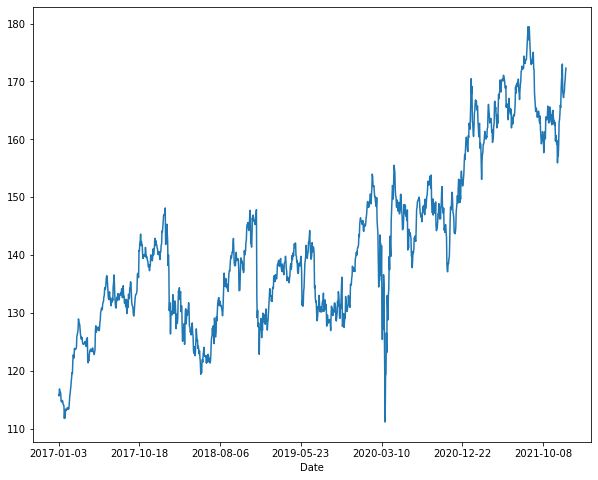

In [5]:
# Plot the stock data
plt.figure(figsize=(10, 8))
df['Close'].plot()
plt.show()

In [6]:
# Create a new column PriceDiff in the DataFrame df
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
display(df.head())

,Open,High,Low,Close,Adj Close,Volume,PriceDiff
Date,,,,,,,
2017-01-03,115.779999,116.000000,115.230003,115.839996,101.522980,5953000,-0.189994
2017-01-04,115.500000,116.230003,115.309998,115.650002,101.356468,5828900,1.209999
2017-01-05,116.000000,116.970001,115.440002,116.860001,102.416908,6217200,-0.559998
2017-01-06,116.669998,117.000000,115.760002,116.300003,101.926117,5221400,-0.020004
2017-01-09,116.349998,116.610001,115.889999,116.279999,101.908600,5457500,-0.119995


In [7]:
# Daily Return is calcuated as PriceDiff/Close
df['Return'] = df['PriceDiff'] /df['Close']
display(df.head())

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
Date,,,,,,,,
2017-01-03,115.779999,116.000000,115.230003,115.839996,101.522980,5953000,-0.189994,-0.001640
2017-01-04,115.500000,116.230003,115.309998,115.650002,101.356468,5828900,1.209999,0.010463
2017-01-05,116.000000,116.970001,115.440002,116.860001,102.416908,6217200,-0.559998,-0.004792
2017-01-06,116.669998,117.000000,115.760002,116.300003,101.926117,5221400,-0.020004,-0.000172
2017-01-09,116.349998,116.610001,115.889999,116.279999,101.908600,5457500,-0.119995,-0.001032


In [8]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - df
df['Direction'] = [1 if df['PriceDiff'].loc[ei] > 0 else 0 for ei in df.index]
display(df.head())

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2017-01-03,115.779999,116.000000,115.230003,115.839996,101.522980,5953000,-0.189994,-0.001640,0
2017-01-04,115.500000,116.230003,115.309998,115.650002,101.356468,5828900,1.209999,0.010463,1
2017-01-05,116.000000,116.970001,115.440002,116.860001,102.416908,6217200,-0.559998,-0.004792,0
2017-01-06,116.669998,117.000000,115.760002,116.300003,101.926117,5221400,-0.020004,-0.000172,0
2017-01-09,116.349998,116.610001,115.889999,116.279999,101.908600,5457500,-0.119995,-0.001032,0


In [9]:
# Munging the stock data and add two columns - MA10 and MA50
# using Rolling Window calculation (.rolling()) - Moving average
# use dropna to remove any "Not a Number" data
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA10,MA50
Date,,,,,,,,,,,
2017-03-15,127.050003,129.000000,126.599998,128.960007,113.769302,8360600,-0.500000,-0.003877,0,125.391000,117.828800
2017-03-16,128.440002,128.699997,127.769997,128.460007,113.328224,7610700,-0.400009,-0.003114,0,125.874001,118.081201
2017-03-17,128.449997,128.940002,127.949997,128.059998,112.975311,13300800,0.010009,0.000078,1,126.301001,118.329401
2017-03-20,128.039993,128.419998,127.970001,128.070007,112.984138,5827500,-0.820007,-0.006403,0,126.737002,118.553601
2017-03-21,128.380005,128.449997,127.139999,127.250000,112.260735,7578600,-0.989998,-0.007780,0,127.079002,118.772601


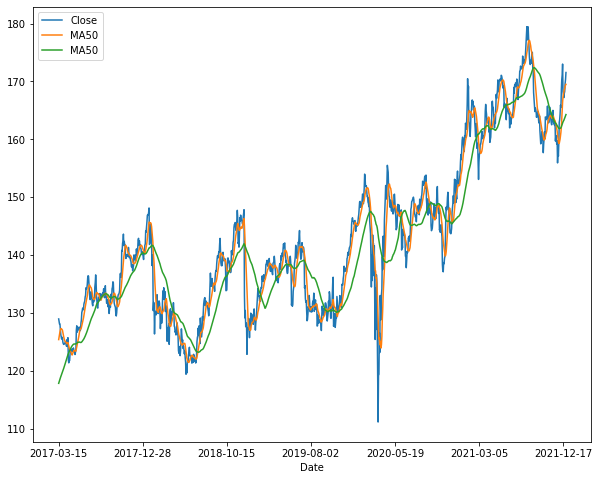

In [10]:
#plot the moving average
plt.figure(figsize=(10, 8))
df['Close'].loc['2017-01-01':'2021-12-31'].plot(label='Close')
df['MA10'].loc['2017-01-01':'2021-12-31'].plot(label='MA50')
df['MA50'].loc['2017-01-01':'2021-12-31'].plot(label='MA50')
plt.legend()
plt.show()

In [11]:
# Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]
display(df.head())

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA10,MA50,Shares
Date,,,,,,,,,,,,
2017-03-15,127.050003,129.000000,126.599998,128.960007,113.769302,8360600,-0.500000,-0.003877,0,125.391000,117.828800,1
2017-03-16,128.440002,128.699997,127.769997,128.460007,113.328224,7610700,-0.400009,-0.003114,0,125.874001,118.081201,1
2017-03-17,128.449997,128.940002,127.949997,128.059998,112.975311,13300800,0.010009,0.000078,1,126.301001,118.329401,1
2017-03-20,128.039993,128.419998,127.970001,128.070007,112.984138,5827500,-0.820007,-0.006403,0,126.737002,118.553601,1
2017-03-21,128.380005,128.449997,127.139999,127.250000,112.260735,7578600,-0.989998,-0.007780,0,127.079002,118.772601,1


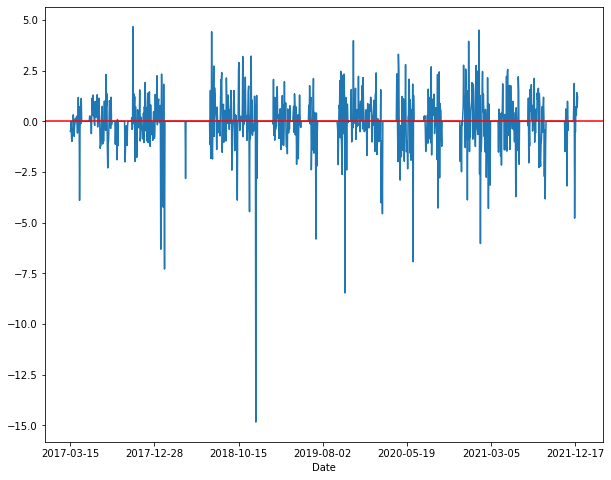

In [12]:
# Add a new column "Profit" using List Comprehension, for any rows in df, 
# if Shares=1, the profit is calculated as the close price of tomorrow - the close price of today. Otherwise the profit is 0.

# Plot a graph to show the Profit/Loss
plt.figure(figsize=(10,8))
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')

In [13]:
#Use .cumsum() to calculate the accumulated wealth over the period

df['wealth'] = df['Profit'].cumsum()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,,
2021-12-22,167.059998,168.169998,166.119995,167.929993,167.929993,4178200,0.320007,0.001906,1,168.539998,163.501599,1,168.250000,0.320007,-35.620003
2021-12-23,167.880005,168.949997,167.360001,168.250000,168.250000,3501500,1.419998,0.008440,1,168.774998,163.682599,1,169.669998,1.419998,-34.200005
2021-12-27,169.139999,169.850006,168.699997,169.669998,169.669998,3704800,0.680008,0.004008,1,169.192998,163.873799,1,170.350006,0.680008,-33.519997
2021-12-28,169.789993,170.639999,169.589996,170.350006,170.350006,3187000,1.199997,0.007044,1,169.382999,164.054799,1,171.550003,1.199997,-32.320000
2021-12-29,170.000000,171.990005,169.910004,171.550003,171.550003,3662000,0.759995,0.004430,1,169.509000,164.283399,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is -32.32000000000002')

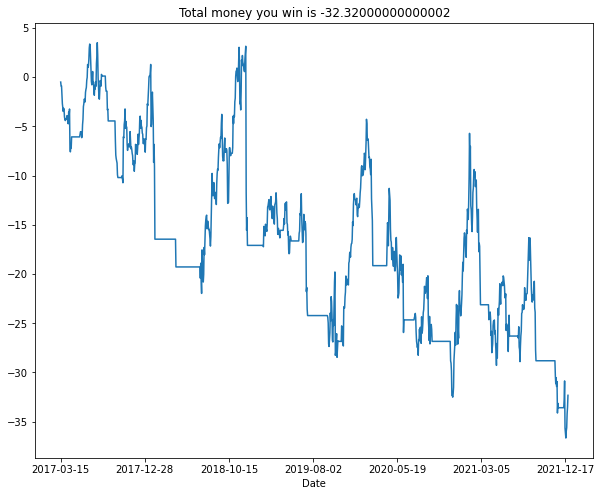

In [14]:
#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(10,8))
df['wealth'].plot()
plt.title('Total money you win is {}'.format(df.loc[df.index[-2], 'wealth']))

### Estimate the average stock return with 90% Confidence Interval

In [15]:
import numpy as np
from scipy.stats import norm

In [16]:
# we will use log return for average stock return of JNJ

df['logReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])

In [17]:
# Lets build 90% confidence interval for log return
sample_size = df['logReturn'].shape[0]
sample_mean = df['logReturn'].mean()
sample_std = df['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [18]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-0.0003731124020920865, 0.0008459747943925955)
